In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("modified_h4_summary_2.csv")

# 스타일 설정
sns.set(style="whitegrid")

In [2]:
pd.set_option('display.max_columns', None)  # 모든 열 표시
pd.set_option('display.max_rows', None)  # 모든 행 표시

# 데이터프레임 출력
df

,work,hot,cold,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,rocksdb.bytes.compressed.from,rocksdb.bytes.compressed.to,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio,case
0,write,ZSTD,ZSTD,1,215.989,0,250256,59110061,266389530,16407311946,1806121,7276707840,4620763,5853952,3777,1802344,0,0,0,46993481,94012927221,296601423,2.004610,9.808885,17.122193,800.0,1806121,6963421,3.855457,8.419907,14.090376,34.585866,3201283.0,1000000,214501770,214.501770,0.019839,4.066604,0.441135,0.002091,7.596365e+07,0.315490,zstd
1,read,Snappy,Snappy,1,20.983,679106,0,0,11284192,0,1000000,12665978880,900816,2326121,0,1000000,0,0,0,117649,226474778,11212114,10.932704,49.788358,69.790461,830.0,1000000,19688107,19.688107,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.293544,0.279155,0.000000,0.000000e+00,4.950712,snappy
2,read,LZ4,LZ4,3,12.967,678509,0,0,442063,0,1000000,12658835456,1161771,2030310,0,1000000,0,0,0,0,61986262,421126,8.755086,29.777500,33.479661,845.0,1000000,11809587,11.809587,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294274,0.363954,0.000000,0.000000e+00,0.679386,lz4
3,read,Zlib,Zlib,3,44.595,678529,0,0,3575178,0,1000000,12653854720,946497,2179057,0,1000000,0,0,0,2755123,813966804,3324276,20.250963,138.713836,164.138373,893.0,1000000,43271304,43.271304,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294783,0.302825,0.000000,0.000000e+00,0.408404,zlib
4,read,Zlib,Zlib,1,59.309,679155,0,0,791502,0,1000000,12666486784,1251194,2883307,0,1000000,0,0,0,426540,179541720,733717,49.634830,136.344975,163.384182,936.0,1000000,58036462,58.036462,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.293492,0.302623,0.000000,0.000000e+00,0.408661,zlib
5,read,Snappy,Snappy,2,18.552,678309,0,0,3089355,0,1000000,12647743488,1206466,2021422,0,1000000,0,0,0,0,61973942,3068413,9.380357,45.632500,58.745987,831.0,1000000,17387750,17.387750,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.295409,0.373763,0.000000,0.000000e+00,4.951134,snappy
6,read,LZ4,LZ4,1,13.022,679645,0,0,442347,0,1000000,12671156224,1174693,2019593,0,1000000,0,0,0,0,62019153,421400,8.792951,29.873445,33.551465,798.0,1000000,11858636,11.858636,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.293015,0.367748,0.000000,0.000000e+00,0.679468,lz4
7,write,ZSTD,ZSTD,3,193.977,0,250372,59098541,266456545,16407310918,1806015,7280345088,4578971,5854806,3777,1802238,0,0,0,47262545,94029540110,296651831,1.992202,9.788960,16.279925,778.0,1806015,6951580,3.849126,8.492948,14.545950,43.080026,2757323.0,1000000,192408746,192.408746,0.019842,4.064333,0.438860,0.002091,8.458380e+07,0.315488,zstd
8,read,ZSTD,ZSTD,3,13.242,678965,0,0,229370,0,1000000,12661014528,1162542,2024479,0,1000000,0,0,0,0,62035323,208416,8.830104,30.302283,33.800596,808.0,1000000,12021015,12.021015,0.000000,0.000000,0.000000,0.0,0,0,0.000000,0.000000,1.294051,0.364774,0.000000,0.000000e+00,0.335963,zstd
9,write,LZ4,LZ4,3,230.968,0,250238,114564212,533629708,16407310709,1806039,7277756416,4558061,5853549,3774,1802265,0,0,0,41746725,94015582666,619295371,1.969052,9.721859,14.902624,830.0,1806039,6755277,3.740383,8.472808,14.385077,38.099007,3296950.0,1000000,229507332,229.507332,0.039506,4.065833,0.437786,0.002090,7.103716e+07,0.658716,lz4


In [3]:
# 작업 유형별로 필터링
df_read = df[df['work'] == 'read']
df_write = df[df['work'] == 'write']

In [4]:
df_write_avg = df_write.groupby('case').mean(numeric_only=True).reset_index()
df_write_avg

,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,rocksdb.bytes.compressed.from,rocksdb.bytes.compressed.to,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio
0,lz4,2.0,239.761000,0.0,250467.000000,1.144076e+08,5.263624e+08,1.640731e+10,1.806038e+06,7.281519e+09,5.566370e+06,5.779957e+06,5100.000000,1.800938e+06,0.0,0.0,0.0,4.038452e+07,9.292422e+10,6.122043e+08,2.387928,9.784380,15.446908,808.666667,1.806038e+06,7.431280e+06,4.114688,8.491081,14.458618,39.706492,3.979589e+06,1000000.0,2.382509e+08,238.250894,0.039054,4.063732,0.483252,0.002824,7.284414e+07,0.658823
1,snappy,2.0,243.553333,0.0,250091.333333,8.038434e+08,3.897375e+09,1.640731e+10,1.806054e+06,7.275102e+09,5.805443e+06,5.897122e+06,4500.000000,1.801554e+06,0.0,0.0,0.0,5.851263e+07,9.477572e+10,4.672050e+09,2.643458,14.268688,21.865845,804.666667,1.806054e+06,9.123516e+06,5.051636,8.491206,14.325978,32.443355,4.369228e+06,1000000.0,2.420412e+08,242.041225,0.286532,4.067352,0.493549,0.002492,6.798634e+07,4.929582
2,zlib,2.0,222.129000,0.0,250482.000000,7.108198e+07,2.068894e+08,1.640731e+10,1.806052e+06,7.281536e+09,1.042354e+07,4.285505e+06,3776.666667,1.802276e+06,0.0,0.0,0.0,1.933215e+08,6.719760e+10,2.572731e+08,4.099207,35.786539,77.000565,836.333333,1.806052e+06,2.030547e+07,11.243021,8.445026,13.818183,15.226066,3.434529e+06,1000000.0,2.206312e+08,220.631214,0.016942,4.063755,0.704897,0.002091,7.554668e+07,0.382925
3,zstd,2.0,198.049000,0.0,250197.000000,5.910408e+07,2.663825e+08,1.640731e+10,1.806074e+06,7.276511e+09,4.584989e+06,5.853659e+06,3776.333333,1.802298e+06,0.0,0.0,0.0,4.722346e+07,9.400987e+10,2.965893e+08,2.020037,9.780045,16.121154,793.666667,1.806074e+06,6.946170e+06,3.846005,8.455170,14.198435,32.770128,2.944509e+06,1000000.0,1.965329e+08,196.532892,0.019838,4.066608,0.439228,0.002091,8.320999e+07,0.315487


In [5]:
df_read_avg = df_read.groupby('case').mean(numeric_only=True).reset_index()
df_read_avg

,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,rocksdb.block.cache.hit,rocksdb.block.cache.miss,rocksdb.memtable.hit,rocksdb.memtable.miss,rocksdb.db.get.micros,rocksdb.db.write.micros,rocksdb.db.seek.micros,rocksdb.compaction.total.time.cpu_micros,rocksdb.bytes.compressed.from,rocksdb.bytes.compressed.to,get.P50,get.P95,get.P99,get.P100,get.COUNT,get.SUM,get.AVG,write.P50,write.P95,write.P99,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio
0,lz4,2.0,13.228000,678827.000000,0.0,0.0,7.816750e+06,0.0,1000000.0,1.266248e+10,8.678493e+05,2175760.0,0.0,1000000.0,0.0,0.0,0.0,5.782463e+05,1.145871e+09,7.465543e+06,7.802328,30.479248,36.069546,820.000000,1000000.0,1.203359e+07,12.033595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.293901,0.276340,0.0,0.0,0.669775
1,snappy,2.0,19.415333,678956.333333,0.0,0.0,5.820208e+06,0.0,1000000.0,1.265951e+10,1.087649e+06,2130965.0,0.0,1000000.0,0.0,0.0,0.0,3.921633e+04,1.167911e+08,5.782226e+06,9.890795,47.053499,62.489960,820.666667,1000000.0,1.820090e+07,18.200898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294206,0.337983,0.0,0.0,4.951093
2,zlib,2.0,46.620667,679062.333333,0.0,0.0,1.547151e+06,0.0,1000000.0,1.266261e+10,1.123088e+06,2243452.0,0.0,1000000.0,0.0,0.0,0.0,1.060554e+06,3.518372e+08,1.437274e+06,30.097601,123.553713,145.339889,884.666667,1000000.0,4.536173e+07,45.361732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.293888,0.339346,0.0,0.0,0.408815
3,zstd,2.0,13.383500,678565.000000,0.0,0.0,2.294020e+05,0.0,1000000.0,1.265263e+10,1.155240e+06,2031136.5,0.0,1000000.0,0.0,0.0,0.0,0.000000e+00,6.203529e+07,2.084480e+05,8.913967,30.576201,35.211214,806.000000,1000000.0,1.214854e+07,12.148542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.294909,0.362556,0.0,0.0,0.336015


## Write

/tmp/ipykernel_3972/2432649000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)


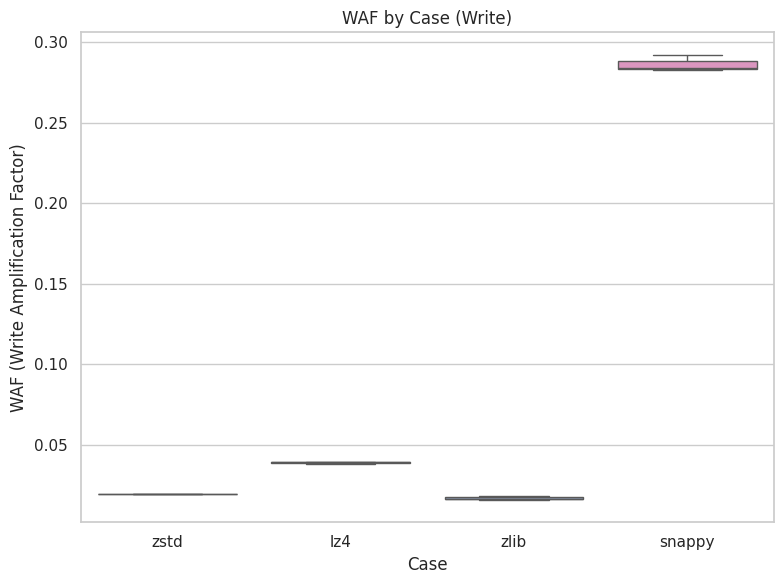

In [6]:
# Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)
plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/205539061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')


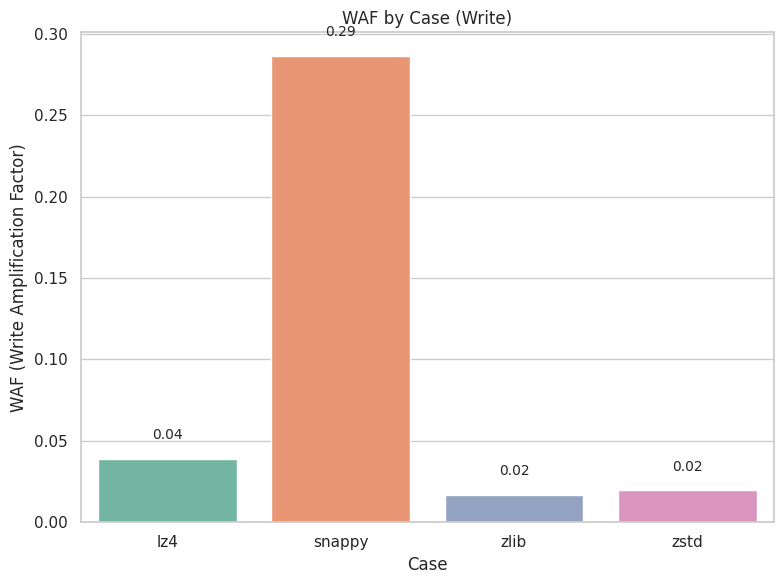

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')
plt.tight_layout()
plt.show()

In [8]:
df_write.groupby('case')['WAF'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
lz4,3.0,0.039054,0.000770,0.038165,0.038828,0.039490,0.039498,0.039506
snappy,3.0,0.286532,0.005129,0.283075,0.283585,0.284096,0.288261,0.292425
zlib,3.0,0.016942,0.001361,0.015839,0.016181,0.016524,0.017493,0.018463
zstd,3.0,0.019838,0.000005,0.019833,0.019836,0.019839,0.019840,0.019842


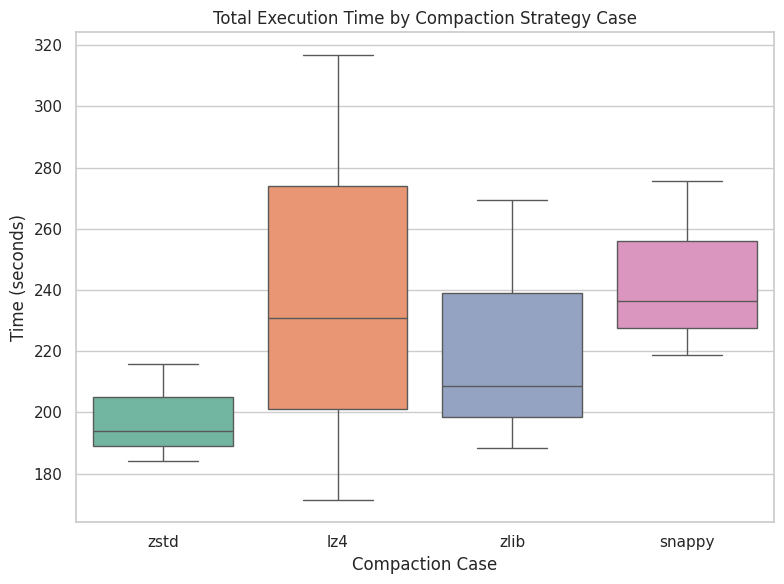

In [9]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/1952208775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')


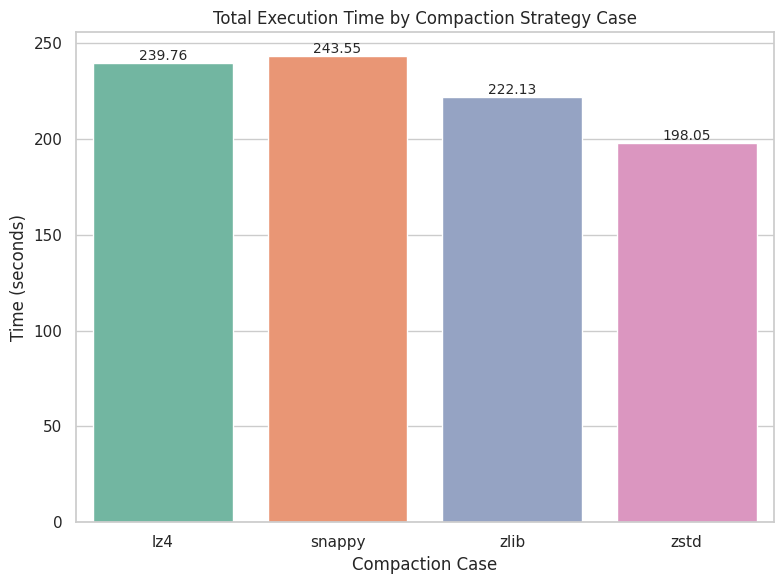

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

In [11]:
df_write.groupby('case')['time(s)'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
lz4,3.0,239.761000,73.149941,171.405,201.1865,230.968,273.9390,316.910
snappy,3.0,243.553333,29.025428,218.792,227.5825,236.373,255.9340,275.495
zlib,3.0,222.129000,42.131072,188.492,198.5010,208.510,238.9475,269.385
zstd,3.0,198.049000,16.290276,184.181,189.0790,193.977,204.9830,215.989


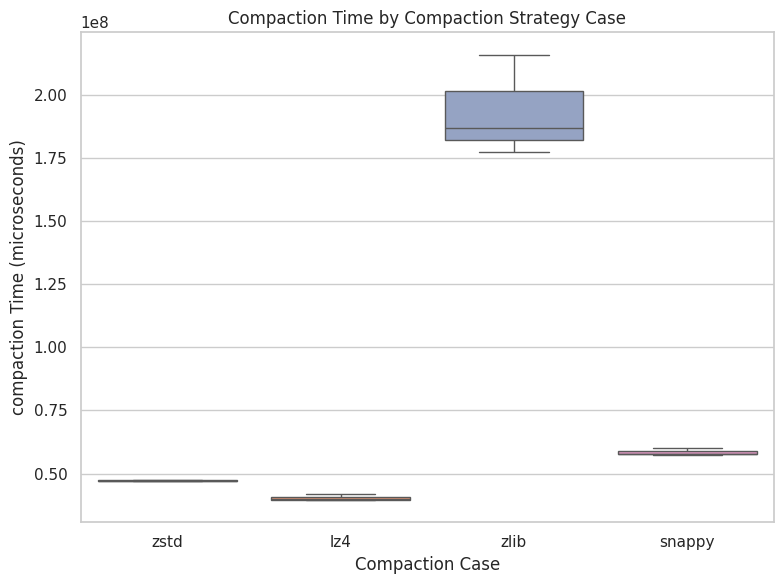

In [12]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/1693509766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')


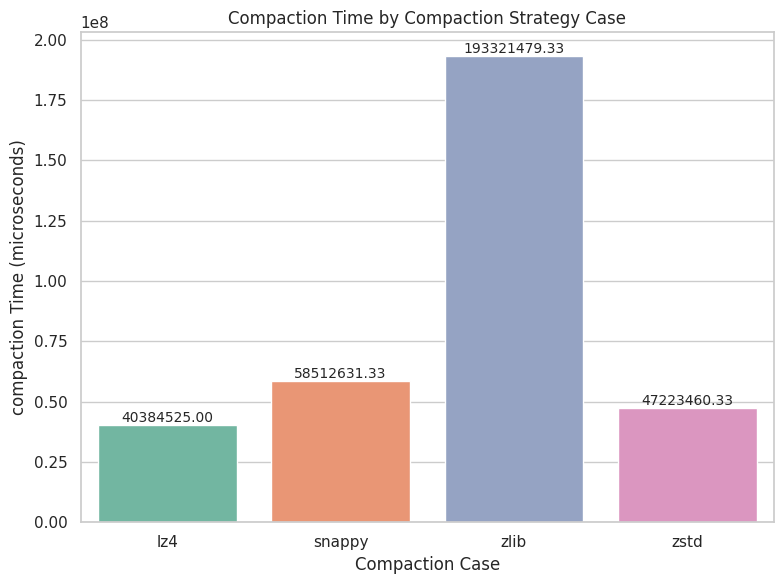

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

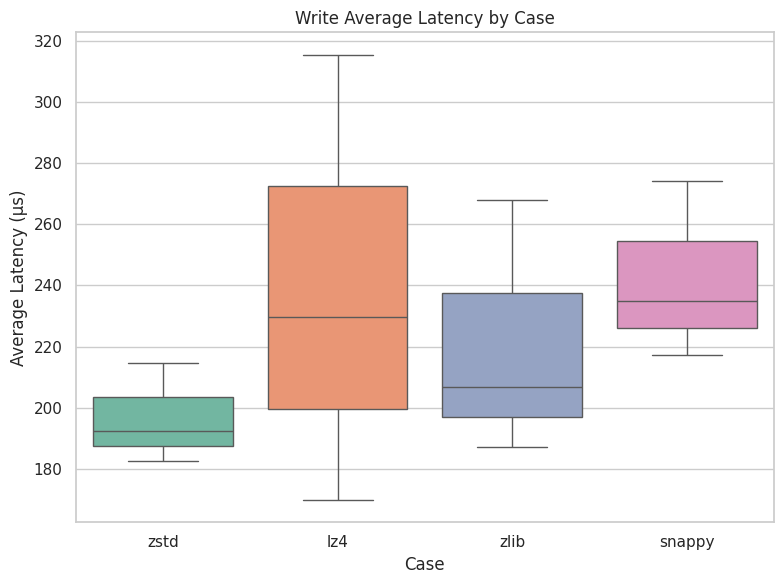

In [14]:
# Write Average Latency by Case
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='write.AVG', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/2588844532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')


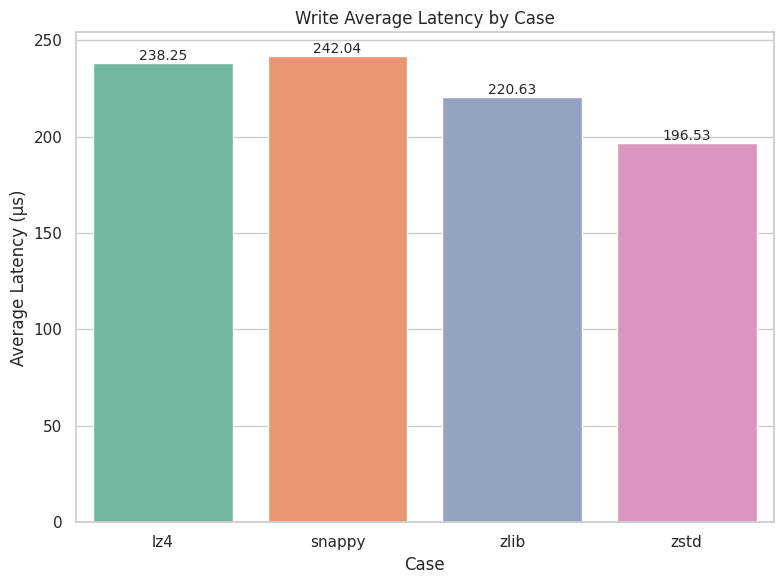

In [15]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

In [16]:
df_write.groupby('case')['write.AVG'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
lz4,3.0,238.250894,73.181652,169.833824,199.670578,229.507332,272.459429,315.411525
snappy,3.0,242.041225,29.064987,217.264902,226.044418,234.823933,254.429386,274.034840
zlib,3.0,220.631214,42.162252,187.056603,196.971467,206.886331,237.418520,267.950709
zstd,3.0,196.532892,16.302849,182.688159,187.548452,192.408746,203.455258,214.501770


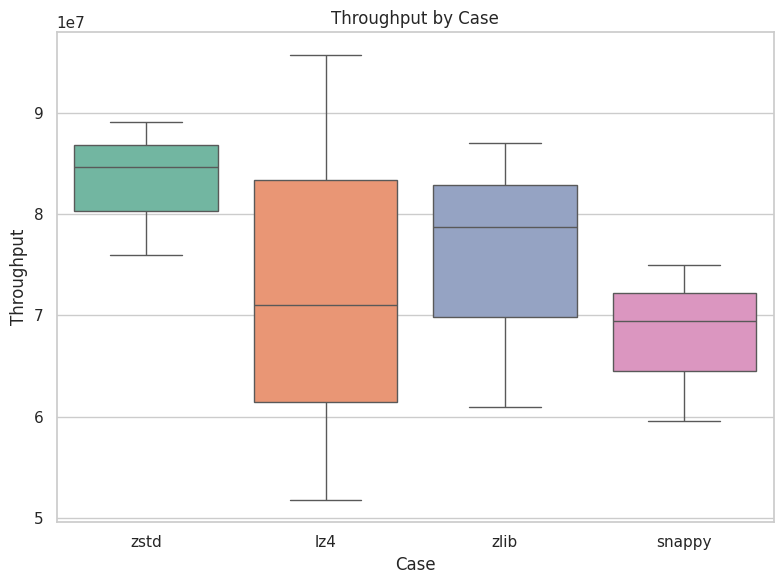

In [17]:
# Throughput
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='throughput', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/3585659375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')


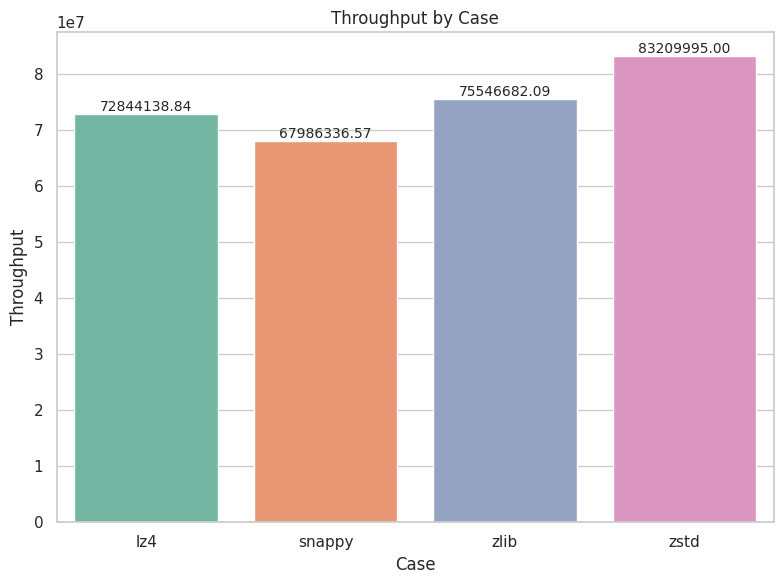

In [18]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

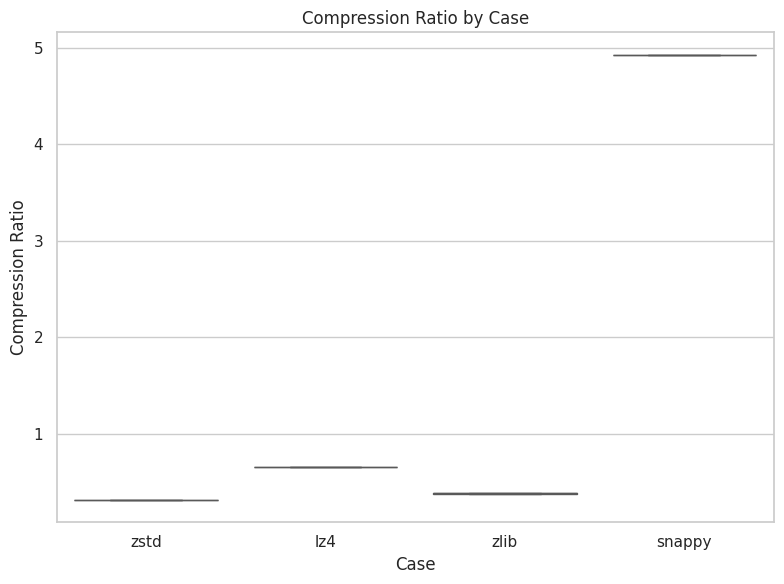

In [19]:
# compression ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='compression_ratio', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/1352047339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='compression_ratio', data=df_write_avg, palette='Set2')


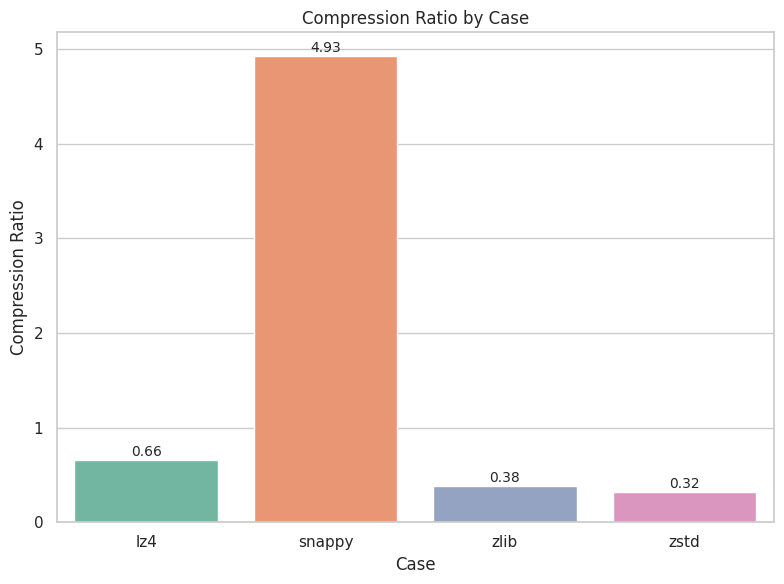

In [20]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='compression_ratio', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

## Read

/tmp/ipykernel_3972/1373416525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)


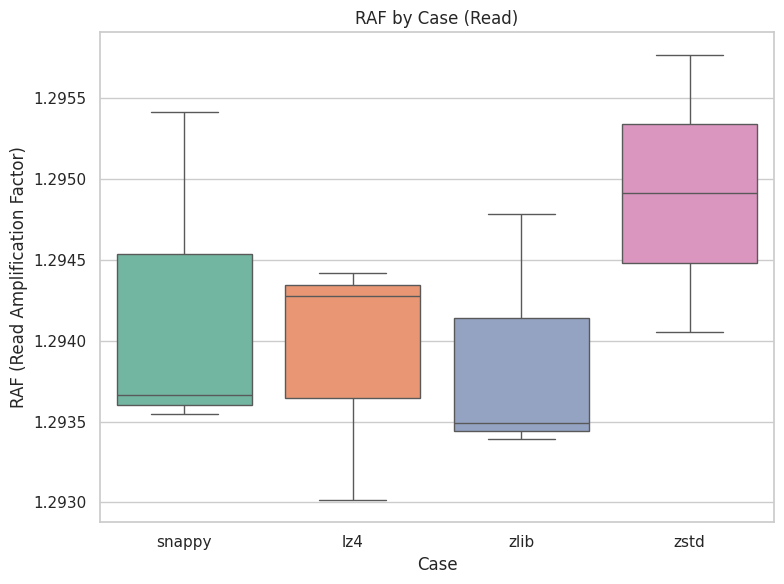

In [21]:
# RAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)
plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/2467909650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')


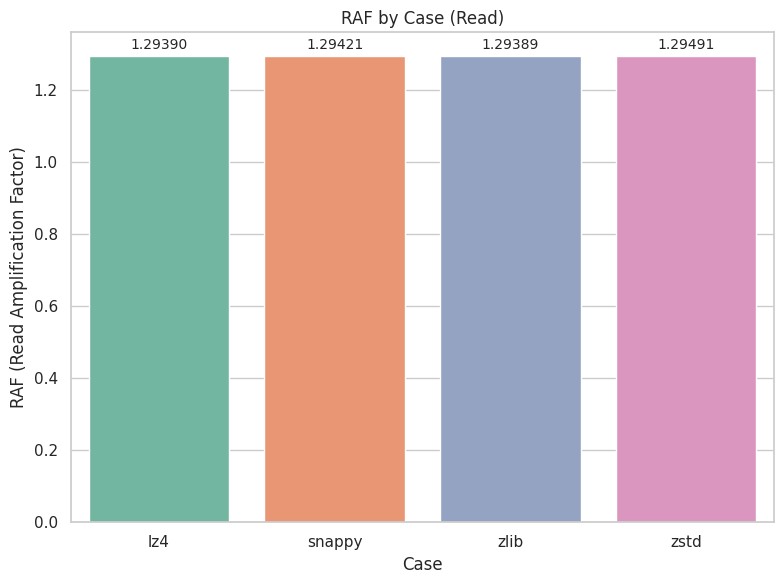

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')
plt.tight_layout()
plt.show()

In [23]:
df_read.groupby('case')['RAF'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
lz4,3.0,1.293901,0.000770,1.293015,1.293645,1.294274,1.294344,1.294415
snappy,3.0,1.294206,0.001044,1.293544,1.293604,1.293664,1.294537,1.295409
zlib,3.0,1.293888,0.000777,1.293390,1.293441,1.293492,1.294138,1.294783
zstd,2.0,1.294909,0.001213,1.294051,1.294480,1.294909,1.295338,1.295766


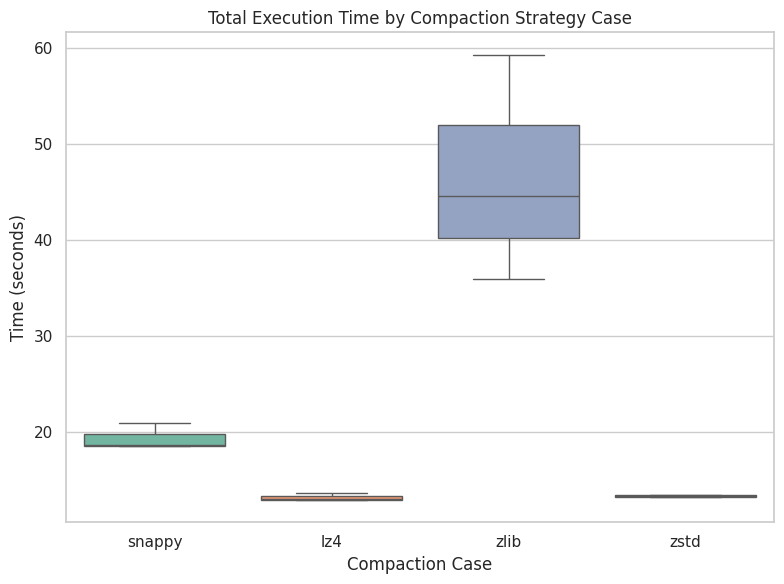

In [24]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/2413868267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')


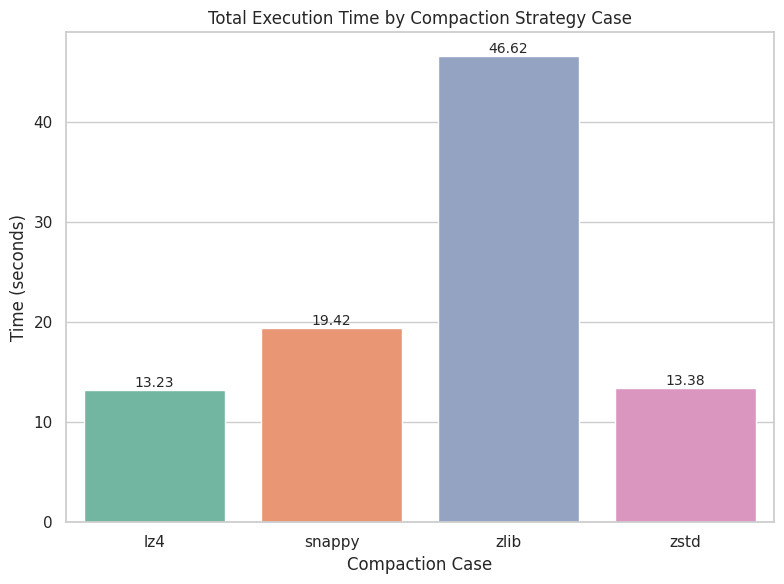

In [25]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

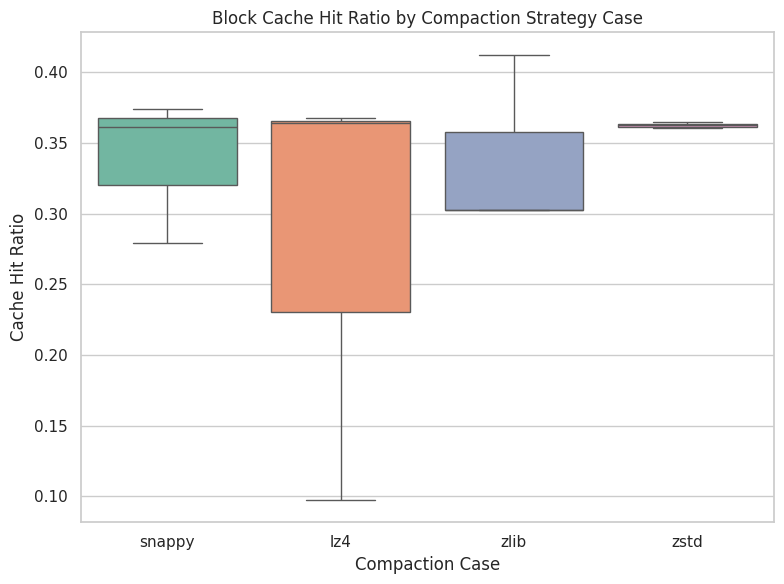

In [26]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/921772678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')


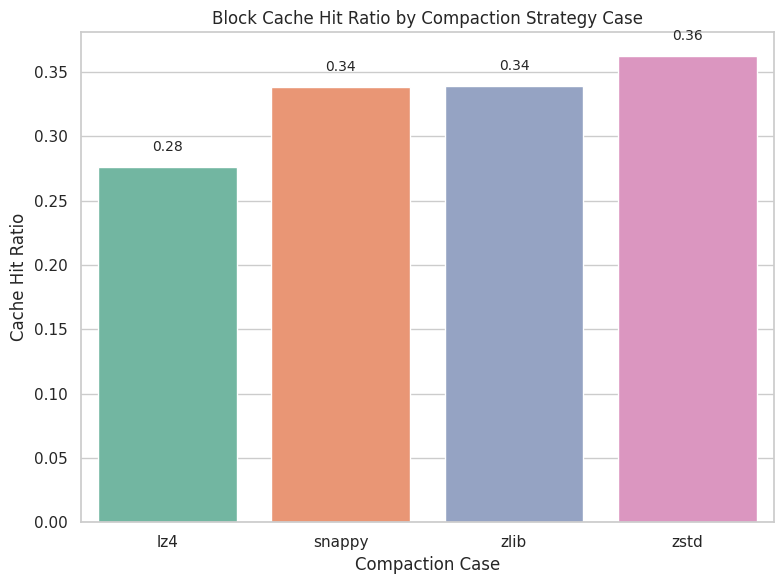

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

In [28]:
df_read.groupby('case')[['RAF', 'get.AVG']].mean(numeric_only=True)

,RAF,get.AVG
case,,
lz4,1.293901,12.033595
snappy,1.294206,18.200898
zlib,1.293888,45.361732
zstd,1.294909,12.148542


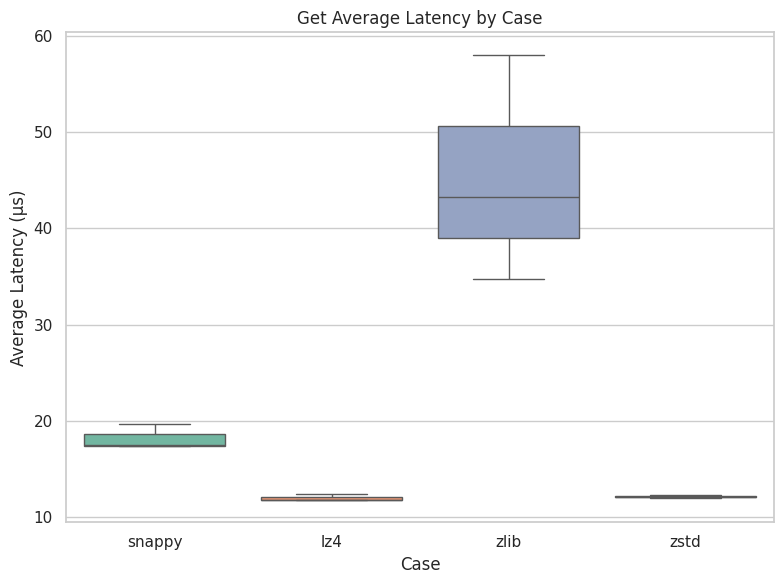

In [29]:
# Latency
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='get.AVG', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/2039202209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')


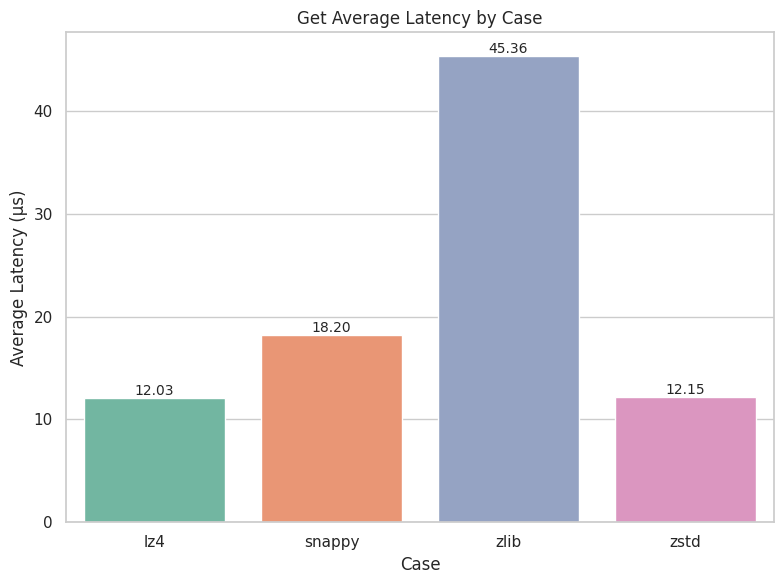

In [30]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

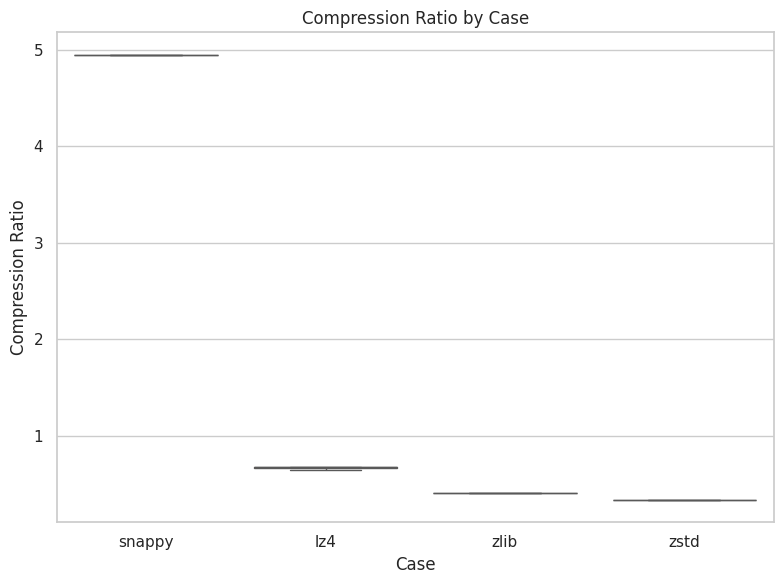

In [31]:
# compression ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='compression_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3972/1598831252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='compression_ratio', data=df_read_avg, palette='Set2')


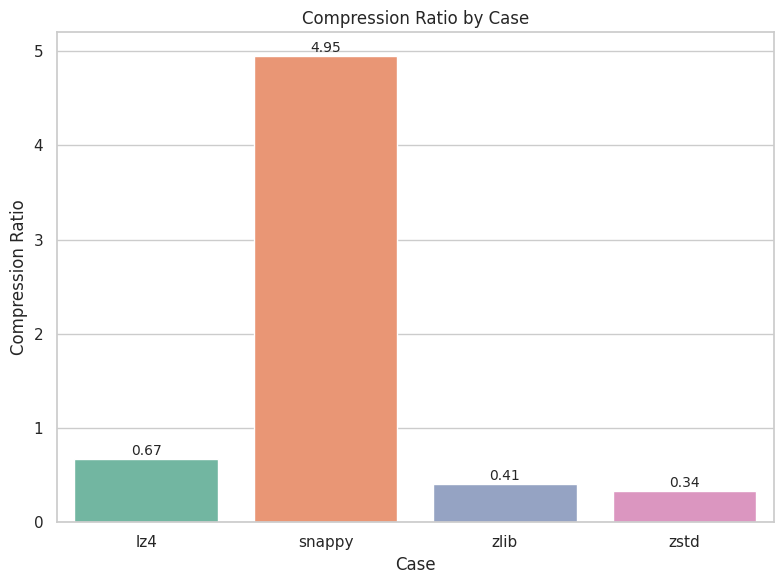

In [32]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='compression_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()